## Timelapse ERT of tracer injection
This example demonstrates timelapse ERT strategies on behalf of field data. The data are from a tracer injection (Kuras et al. 2009) into a shallow aquifer which is monitored by crosshole data in 9 boreholes. See the example on http://pygimli.org

In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
from pygimli.viewer.mpl import showDataContainerAsMatrix
from glob import glob

In [2]:
DATA = [ert.load(filename) for filename in glob("*.dat")]
for data in DATA:
    data["k"] = ert.geometricFactors(data, dim=3)
    data["rhoa"] = data["r"] * data["k"]
    data["r"] = 0
    print(data)

Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']


In [3]:
print([np.argmax(data["rhoa"]) for data in DATA])
print([np.argmin(data["rhoa"]) for data in DATA])

[155, 155, 155, 155, 155, 155]
[678, 1096, 815, 678, 599, 451]


Doing so we observe that there are a few data with rather high apparent resistivities and remove these.

In [4]:
for data in DATA:
    data.remove([154, 155, 323])
print("Lowest values")
for data in DATA:
    print(np.sort(data["rhoa"])[:5])
print("Highest values")    
for data in DATA:
    print(np.sort(data["rhoa"])[-5:])

Lowest values
[23.39278836 24.08996503 24.15854971 24.72736928 25.08682023]
[17.75151044 18.04688715 19.98871152 20.19222066 20.49607029]
[18.38934381 20.23160074 21.64902073 22.12831331 22.44443207]
[ 6.95461275  7.57208275 11.32049182 11.60946139 11.86063962]
[7.25036319 7.93265812 8.2732377  8.53520656 8.82950418]
[ 8.28102061  9.13089055  9.17220191 11.30882288 13.57052201]
Highest values
[136.35420595 149.99266334 180.37215387 181.85035034 192.9622767 ]
[135.96260857 150.04009934 168.54808672 173.31417536 178.75210315]
[135.64933067 148.75932708 176.00526647 184.06118505 184.72275033]
[137.84227597 150.98881954 184.01629512 189.12303029 193.42852753]
[137.33319939 150.22984338 183.16983184 186.08333832 196.80884604]
[126.79923    138.98750904 180.32010405 186.97345261 200.4368603 ]


Mesh: Nodes: 3977 Cells: 3840 Boundaries: 7816


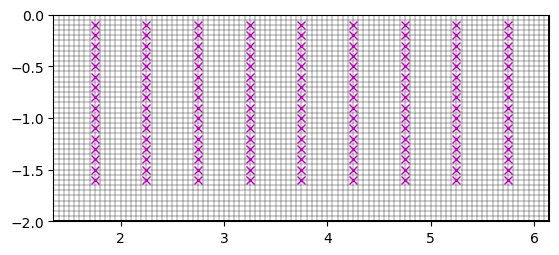

In [5]:
ex = np.unique(pg.x(data))
ez = np.unique(pg.z(data))
dx = 0.05
nb = 8
xmin, xmax = min(ex) - nb*dx, max(ex) + nb*dx
zmin, zmax = min(ez) - nb*dx, 0
x = np.arange(xmin, xmax+.001, dx)
z = np.arange(zmin, zmax+.001, dx)
grid = mt.createGrid(x, z, marker=2)
ax, cb = pg.show(grid)
ax.plot(pg.x(data), pg.z(data), "mx")
print(grid)

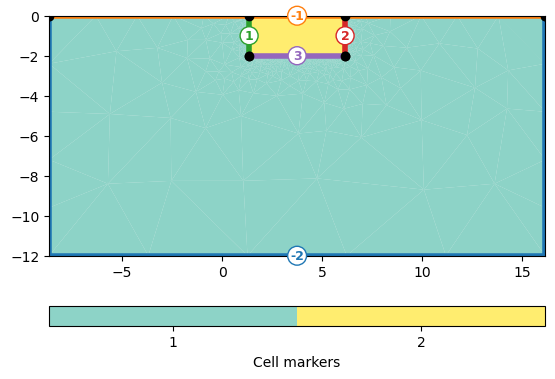

In [6]:
mesh = mt.appendTriangleBoundary(grid, marker=1, boundary=5, worldMarkers=1)
ax, cb = pg.show(mesh, markers=True)

Let's look at the data

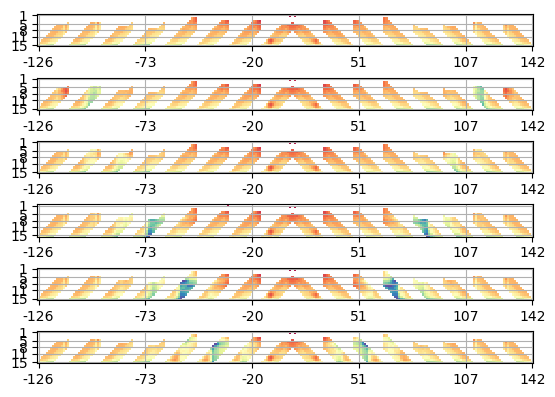

In [7]:
fig, ax = pg.plt.subplots(nrows=6)
for i, data in enumerate(DATA):
    m = np.sign(data["m"] - data["n"]) * data["m"]
    showDataContainerAsMatrix(data, m, data["a"] % 16, "rhoa", ax=ax.flat[i], 
                              cMap="Spectral_r", cMin=10, cMax=200, colorBar=False)
    data["err"] = ert.estimateError(data)

07/06/23 - 05:55:04 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 05:55:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 05:55:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/06/23 - 05:55:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/06/23 - 05:55:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 18214 Cells: 20820 Boundaries: 19578
07/06/23 - 05:55:05 - pyGIMLi - INFO - Use median(data values)=68.61569858885127
07/06/23 - 05:55:05 - pyGIMLi - INFO - Created startmodel from forward operator: 3840 [68.61569858885127,...,68.61569858885127]
07/06/23 - 05:55:05 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000020135906B80>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000020135906C70>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000020135906C20>
min/max (data): 23.39/193
min/max (error): 3%/3%
min/max (start model): 68.62/68.62
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 6.07 (dPhi = 92.58%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2.8 (dPhi = 39.27%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2.64 (dPhi = 1.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.45 (dPhi = 0.79%) lam: 20.0
#############################################################

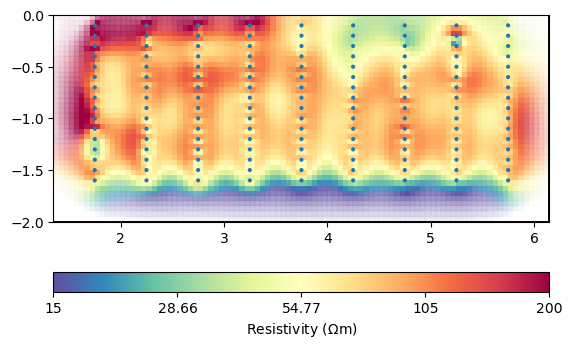

In [8]:
mgr = ert.Manager(DATA[0])
mgr.invert(mesh=mesh, verbose=True)
ax, cb = mgr.showResult(cMin=15, cMax=200)

We select an arbitrary time step like the third.
First, we do an individual inversion.

07/06/23 - 05:56:44 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 05:56:44 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 05:56:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/06/23 - 05:56:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/06/23 - 05:56:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 18214 Cells: 20820 Boundaries: 19578
07/06/23 - 05:56:44 - pyGIMLi - INFO - Use median(data values)=65.21640092078944
07/06/23 - 05:56:44 - pyGIMLi - INFO - Created startmodel from forward operator: 3840 [65.21640092078944,...,65.21640092078944]
07/06/23 - 05:56:44 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000200E40AE130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000200E40AE270>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000200E40AE1D0>
min/max (data): 6.95/193
min/max (error): 3%/3.01%
min/max (start model): 65.22/65.22
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 10.5 (dPhi = 94.28%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3.58 (dPhi = 51.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 3.08 (dPhi = 5.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.7 (dPhi = 3.04%) lam: 20.0
-----------------------------------------------------------

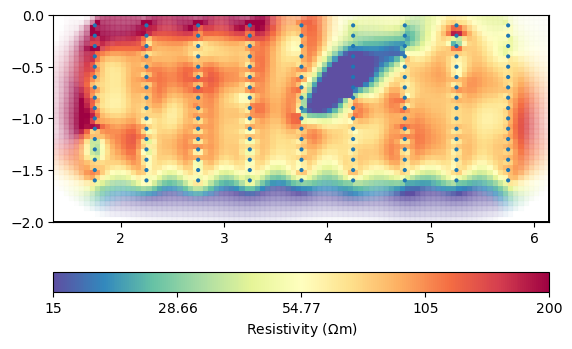

In [9]:
mgrI = ert.Manager(DATA[3])
mgrI.invert(mesh=mesh, verbose=True)
ax, cb = mgrI.showResult(cMin=15, cMax=200)

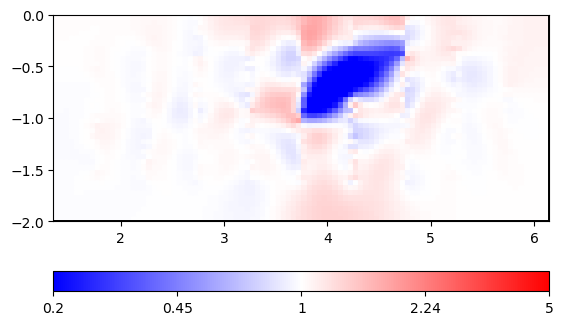

In [10]:
fak = 5
diffkw = dict(cMap="bwr", cMin=1/fak, cMax=fak, logScale=1)
ax, cb = pg.show(mgr.paraDomain, mgrI.model/mgr.model, **diffkw)

In the result, we clearly see the movement of the conductive tracer by lower resistivity, but also areas of increased resistivity, which we don't expect. Therefore, we use the model of the first time step as starting model.

07/06/23 - 05:58:36 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 05:58:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 05:58:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/06/23 - 05:58:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/06/23 - 05:58:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 18214 Cells: 20820 Boundaries: 19578
07/06/23 - 05:58:37 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000200E40AE130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000200E40AE270>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000200E40AE1D0>
min/max (data): 6.95/193
min/max (error): 3%/3.01%
min/max (start model): 8.13/298
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 4.83 (dPhi = 92.63%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2.95 (dPhi = 22.87%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2.7 (dPhi = 3.1%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.69 (dPhi = 0.31%) lam: 20.0
###############################################################

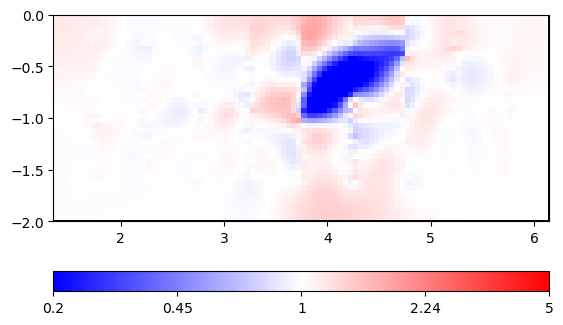

In [11]:
mgrI.invert(mesh=mesh, startModel=mgr.model, verbose=True)
ax, cb = pg.show(mgr.paraDomain, mgrI.model/mgr.model, **diffkw)

As there is no big improvement, we additionally set the starting model as reference model so that only the changes (i.e. the difference in log-resistivity, in other words the log of the ratio, is constrained). As this is smaller than the data, we can increase the regularization.

07/06/23 - 06:00:10 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 06:00:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 06:00:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/06/23 - 06:00:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/06/23 - 06:00:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 18214 Cells: 20820 Boundaries: 19578
07/06/23 - 06:00:10 - pyGIMLi - INFO - Starting inversion.
07/06/23 - 06:00:10 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000200E40AE130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000200E40AE270>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000200E40AE1D0>
min/max (data): 6.95/193
min/max (error): 3%/3.01%
min/max (start model): 8.13/298
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 4.56 (dPhi = 94.16%) lam: 50
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2.73 (dPhi = 23.39%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2.59 (dPhi = 1.27%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.57 (dPhi = 0.1%) lam: 50.0
##############################################################

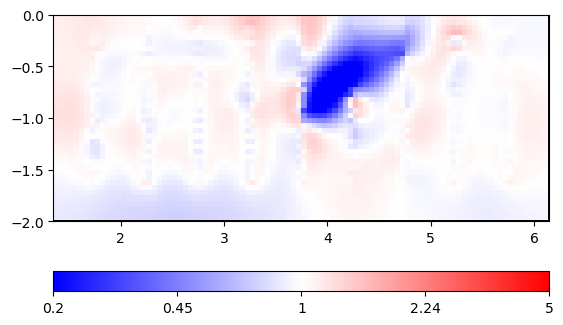

In [12]:
mgrI.invert(mesh=mesh, startModel=mgr.model, isReference=True, lam=50, verbose=True)
ax, cb = pg.show(mgr.paraDomain, mgrI.model/mgr.model, **diffkw)

As a result, we have a similar fit with a model that shows less structure in the difference.

Let's look at the misfit of both inversions.

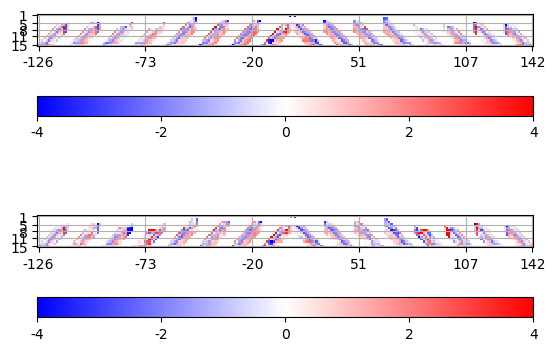

In [13]:
fig, ax = pg.plt.subplots(nrows=2)
kw = dict(cMin=-4, cMax=4, cMap="bwr")
misfit = (np.log(mgr.inv.response) - np.log(mgr.inv.dataVals)) / mgr.inv.errorVals
showDataContainerAsMatrix(data, m, data["a"] % 16, misfit, ax=ax[0], **kw)
misfitI = (np.log(mgrI.inv.response) - np.log(mgrI.inv.dataVals)) / mgrI.inv.errorVals
showDataContainerAsMatrix(data, m, data["a"] % 16, misfitI, ax=ax[1], **kw);

It looks very similar, i.e. there is a lot of systematics in the misfits. Reasons could be effects of the borehole fluid, electrode misplacements, or the three-dimensionality of the subsurface.

The idea of the so-called "difference inversion" (LaBrecque & Yang, 2001) extends regularizing the difference in the model to the data, i.e. to invert only the differences in the data. This leads to removing the misfit of the reference inversion from the later timesteps. 
$$ d_C^n = d^n - (d^0 - f(m^0)) $$

As the data are log-scaled (and differences in the log is the log of the ratio), this leads to
$$ \rho_d^n = \rho_a^n * \frac{\rho_a(m^0)}{\rho_a^0} $$
Note that this works only easily if the quadrupols are identical which is true in our case. If they are different, one should not delete data but use a large error to exclude them practically from inversion.

07/06/23 - 06:01:43 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 06:01:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 06:01:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/06/23 - 06:01:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/06/23 - 06:01:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 18214 Cells: 20820 Boundaries: 19578
07/06/23 - 06:01:44 - pyGIMLi - INFO - Starting inversion.
07/06/23 - 06:01:44 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000200E40B5130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000020135906220>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000020135906630>
min/max (data): 7.01/172
min/max (error): 3%/3.01%
min/max (start model): 8.13/298
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 2.75 (dPhi = 95.97%) lam: 50
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.01 (dPhi = 33.41%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.91 (dPhi = 1.59%) lam: 50.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.91)                   #
##############################

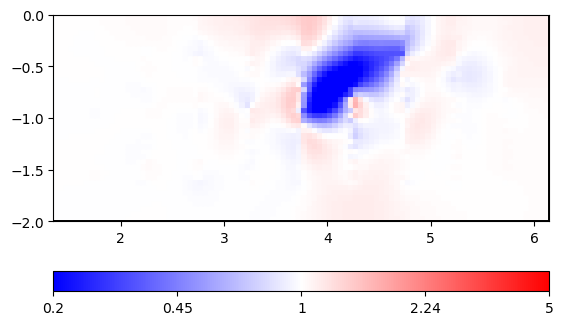

In [14]:
data = DATA[3]
dataD = data.copy()
dataD["rhoa"] = data["rhoa"] * mgr.inv.response / mgr.inv.dataVals
mgrD = ert.Manager(dataD)
mgrD.invert(mesh=mesh, startModel=mgr.model, isReference=True, lam=50, verbose=True)
ax, cb = pg.show(mgrD.paraDomain, mgrD.model/mgr.model, **diffkw)

The very good fit is clearly a sign of removing anomalies in the data that are not due to our tracer injection and allows improved imaging of differences.